In [2]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
#import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

In [2]:
from shapely.geometry import Point

In [3]:
import mapclassify

In [9]:
pwd

'/Users/manalshah/Desktop/ML Project'

In [10]:
cd Dataset

/Users/manalshah/Desktop/ML Project/Dataset


In [11]:
cd NYC

/Users/manalshah/Desktop/ML Project/Dataset/NYC


In [91]:
geojs = gpd.read_file('neighbourhoods.geojson')

df = pd.read_csv('listings-2.csv')
df = df[['latitude','longitude','price']]

df['coords'] = list(zip(df.longitude, df.latitude))
df['coords'] = df['coords'].apply(Point)
df = df[df['price']<=500]

#df.drop('longitude','latitude')

gdf = gpd.GeoDataFrame(df, geometry='coords')

In [71]:
gdf.geometry

0        POINT (-73.98559 40.75356)
1        POINT (-73.95765 40.68494)
2        POINT (-73.95512 40.68535)
3        POINT (-73.99454 40.66265)
4        POINT (-73.98317 40.76457)
                    ...            
36918    POINT (-73.98874 40.71468)
36919    POINT (-73.98171 40.72429)
36920    POINT (-73.95502 40.61315)
36921    POINT (-73.97976 40.72435)
36922    POINT (-73.99359 40.75762)
Name: coords, Length: 33310, dtype: geometry

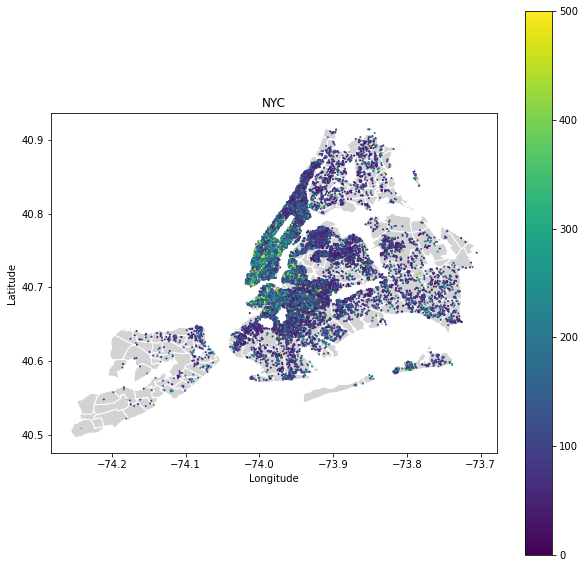

In [93]:
base = geojs.plot(facecolor="lightgray",edgecolor='white', linewidth = 1, figsize=(10,10))
gdf.plot(ax=base, marker='o', column='price', markersize=1, legend=True)
#scheme = mapclassify.Quantiles(gdf["price"], k=5)
# ax = gplt.polyplot(geojs)
# gplt.choropleth(
#   gdf,
#   hue=gdf["price"],
#   edgecolor="white",
#   linewidth=1,
#   cmap="Blues",
#   legend=True,
#   scheme=scheme,
# #   legend_labels=[
# #     "<3 million", "3-6.7 million", "6.7-12.8 million",
# #     "12.8-25 million", "25-37 million"
# #   ],
#   projection=gcrs.AlbersEqualArea(),
#   ax=base
# )

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC')

plt.savefig('Price_map.png', bbox_inches='tight')

/Users/manalshah/opt/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/manalshah/opt/anaconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/manalshah/opt/anaconda3/envs/ml/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/manalshah/opt/anaconda3/envs/ml/lib/python3.8/site-packages/

<GeoAxesSubplot:>

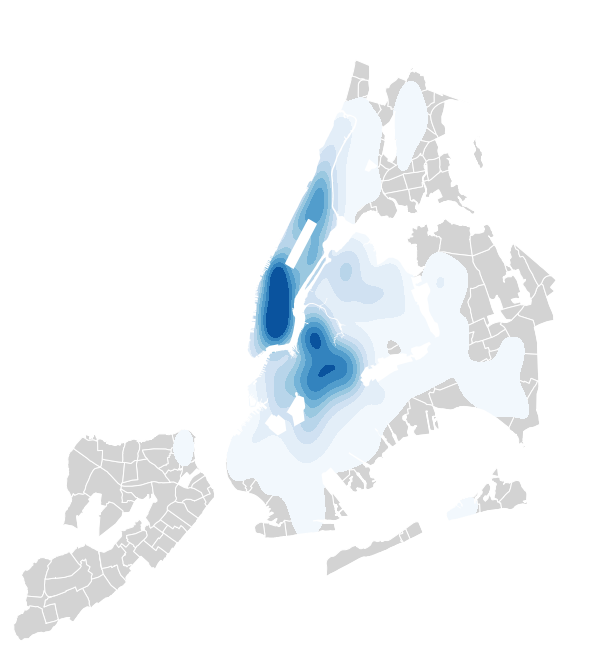

In [74]:
ax = gplt.polyplot(geojs, facecolor="lightgray",edgecolor='white', figsize=(12,12), projection=gcrs.AlbersEqualArea())
gplt.kdeplot(gdf, cmap="Blues", shade=True, clip=geojs, ax=ax)

In [236]:
%cd ../LA

/Users/manalshah/Desktop/ML Project/Dataset/LA


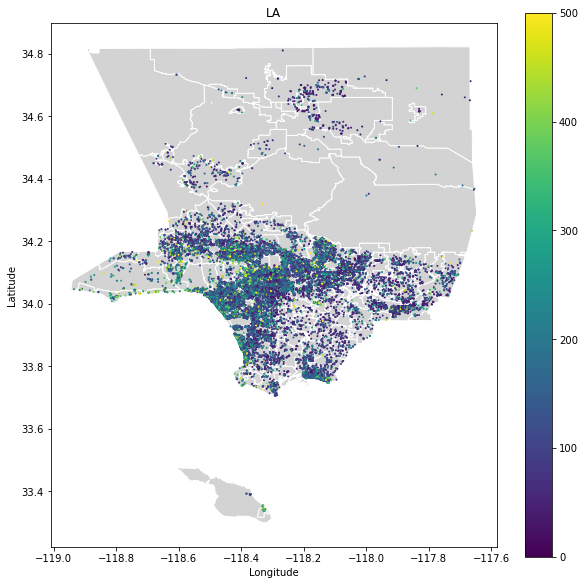

In [89]:
geojs = gpd.read_file('neighbourhoods.geojson')

df = pd.read_csv('listings-2.csv')
df = df[['latitude','longitude','price']]

df['coords'] = list(zip(df.longitude, df.latitude))
df['coords'] = df['coords'].apply(Point)
#df['price'] = np.exp(df['price'])
df = df[df['price']<=500]

#df.drop('longitude','latitude')


gdf = gpd.GeoDataFrame(df, geometry='coords')

base = geojs.plot(facecolor="lightgray",edgecolor='white', linewidth = 1, figsize=(10,10))

gdf.plot(ax=base, marker='o', column='price', markersize=1, legend=True)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('LA')

plt.savefig('Price_map.png', bbox_inches='tight')

In [94]:
ls

Price_map.png           listings.csv            reviews-2.csv
Price_map.svg           neighbourhoods.csv      reviews.csv
listings-2.csv          neighbourhoods.geojson


In [95]:
cd ..

/Users/manalshah/Desktop/ML Project/Dataset


In [96]:
cd NYC

/Users/manalshah/Desktop/ML Project/Dataset/NYC


In [283]:
df = pd.read_csv("listings.csv")
df2 = pd.read_csv("listings-2.csv")

In [148]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [238]:
df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [284]:
p1 = pd.get_dummies(df["room_type"])

In [240]:
df["neighbourhood_group_cleansed"].unique()

array(['Other Cities', 'City of Los Angeles', 'Unincorporated Areas'],
      dtype=object)

In [285]:
p2 = pd.get_dummies(df["neighbourhood_group_cleansed"])

In [286]:
p = pd.concat([p1, p2], axis = 1)

In [287]:
df = pd.concat([df, p], axis = 1)

In [288]:
df["host_response_rate"] = df["host_response_rate"].apply(lambda x: str(x)[:-1] if str(x) != "nan" else x).astype("float64")

In [289]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].apply(lambda x: str(x)[:-1] if str(x) != "nan" else x).astype("float64")

In [290]:
df["host_is_superhost"] = df["host_is_superhost"].apply(lambda x: 1 if str(x) == "t" else 0 if str(x) == "f" else x).astype("float64")

In [291]:
df["total_verifications"] = df["host_verifications"].apply(lambda x: len(x.replace("[", "").replace("]", "").split(",")))

In [292]:
df["host_has_profile_pic"] = df["host_has_profile_pic"].apply(lambda x: 1 if str(x) == "t" else 0 if str(x) == "f" else x).astype("float64")
df["host_identity_verified"] = df["host_identity_verified"].apply(lambda x: 1 if str(x) == "t" else 0 if str(x) == "f" else x).astype("float64")

In [293]:
df["instant_bookable"] = df["instant_bookable"].apply(lambda x: 1 if str(x) == "t" else 0).astype("float64")

In [250]:
df["bathrooms_text"].unique()

array(['2 baths', '1 shared bath', '1 private bath', '1 bath',
       '1.5 baths', '1.5 shared baths', '3.5 baths', '2.5 baths',
       '11 shared baths', '3 baths', nan, '4 baths', '2 shared baths',
       '8 shared baths', '8 baths', '8.5 shared baths', '0 baths',
       '4.5 baths', '2.5 shared baths', '3.5 shared baths', '5 baths',
       'Half-bath', '3 shared baths', '11.5 shared baths', '6.5 baths',
       '4.5 shared baths', '7.5 baths', '0 shared baths', '5.5 baths',
       'Shared half-bath', '6 baths', '7 baths', '11 baths',
       '5 shared baths', '10 baths', 'Private half-bath',
       '4 shared baths', '8.5 baths', '9 baths', '12.5 baths',
       '9.5 baths', '11.5 baths', '10.5 baths', '13 baths',
       '5.5 shared baths', '25 baths', '6 shared baths', '12 baths',
       '15.5 baths'], dtype=object)

In [294]:
df["total_amenities"] = df["amenities"].apply(lambda x: len(x.replace("[", "").replace("]", "").split(",")))

In [99]:
df2.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [295]:
df3 = df.merge(df2, how="left", on = "id")

In [300]:
df3["log_price"] = np.log(df3["price_y"])

/Users/manalshah/opt/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [195]:
df3.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name_x',
       'description', 'neighborhood_overview', 'picture_url', 'host_id_x',
       'host_url',
       ...
       'room_type_y', 'price_y', 'minimum_nights_y', 'number_of_reviews_y',
       'last_review_y', 'reviews_per_month_y',
       'calculated_host_listings_count_y', 'availability_365_y',
       'number_of_reviews_ltm_y', 'license_y'],
      dtype='object', length=102)

In [255]:
print(df3.columns[10:])

Index(['host_name_x', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_x',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude_x',
       'longitude_x', 'property_type', 'room_type_x', 'accommodates',
       'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'price_x', 'minimum_nights_x', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365_x', 'calendar_last_s

In [301]:
cols = ['host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
        'total_verifications', 'total_amenities', 'Entire home/apt',
       'Hotel room', 'Private room', 'Shared room', 'Bronx', 'Brooklyn',
       'Manhattan', 'Queens', 'Staten Island', 'instant_bookable', 
        "host_listings_count", "host_total_listings_count", "accommodates", "bedrooms", "beds", 
#         "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", 
#         "minimum_nights_avg_ntm", "maximum_nights_avg_ntm",
 "availability_30", "availability_60", "availability_90", "availability_365_y", "log_price", "price_y", "minimum_nights_y", "number_of_reviews_y", 'number_of_reviews_ltm_x',
       'number_of_reviews_l30d',
"reviews_per_month_y", "review_scores_rating"]# "review_scores_accuracy", "review_scores_cleanliness",
# "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value" #, "calculated_host_listings_count_y""maximum_nights"

In [196]:
df3.corr()

,id,scrape_id,host_id_x,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,latitude_y,longitude_y,price_y,minimum_nights_y,number_of_reviews_y,reviews_per_month_y,calculated_host_listings_count_y,availability_365_y,number_of_reviews_ltm_y,license_y
id,1.000000,NaN,0.594878,0.041073,0.127925,-0.018985,0.116837,0.116837,-0.039453,0.043805,...,0.008111,0.088883,0.048281,-0.088649,-0.292500,0.193654,0.226348,0.243482,0.074774,NaN
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id_x,0.594878,NaN,1.000000,-0.021981,0.130949,-0.034650,0.053862,0.053862,-0.080857,-0.033674,...,0.038599,0.104276,0.054696,-0.091671,-0.124854,0.211243,0.159663,0.257805,0.109045,NaN
host_response_rate,0.041073,NaN,-0.021981,1.000000,0.474528,0.232204,0.075051,0.075051,0.034044,0.091460,...,-0.031063,0.064989,-0.000620,-0.154260,0.111301,0.106568,0.074255,-0.080161,0.127026,NaN
host_acceptance_rate,0.127925,NaN,0.130949,0.474528,1.000000,0.150685,0.079182,0.079182,-0.005517,0.034996,...,0.015581,0.052717,0.041346,-0.191663,0.128181,0.164177,-0.064908,-0.014726,0.198289,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reviews_per_month_y,0.193654,NaN,0.211243,0.106568,0.164177,0.138466,-0.016363,-0.016363,-0.004885,0.014641,...,-0.032072,0.069122,-0.000883,-0.171123,0.312586,1.000000,-0.003166,0.129838,0.617743,NaN
calculated_host_listings_count_y,0.226348,NaN,0.159663,0.074255,-0.064908,-0.071249,0.569010,0.569010,0.018444,0.103140,...,0.076157,-0.065747,0.011563,0.082431,-0.106264,-0.003166,1.000000,0.223683,-0.040660,NaN
availability_365_y,0.243482,NaN,0.257805,-0.080161,-0.014726,0.094255,0.132954,0.132954,-0.034941,0.022368,...,0.016414,0.097336,0.094364,-0.009934,0.112162,0.129838,0.223683,1.000000,0.111060,NaN
number_of_reviews_ltm_y,0.074774,NaN,0.109045,0.127026,0.198289,0.209422,-0.034430,-0.034430,0.013952,0.010717,...,-0.045806,0.059742,-0.008171,-0.176272,0.523795,0.617743,-0.040660,0.111060,1.000000,NaN


In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/pr/vbbckh1132s7_94b6yhys1rr0000gn/T/ipykernel_17240/2949696060.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


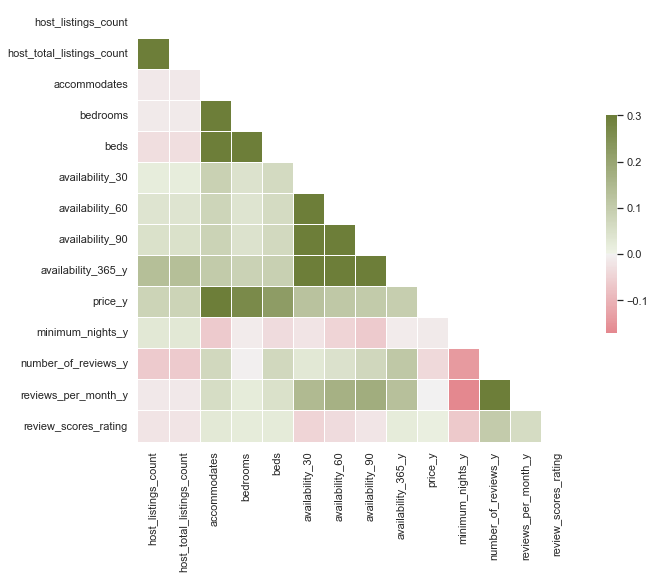

In [132]:
sns.set(style="white")

# Compute the correlation matrix
corr = df3[cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 100, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [302]:
cols = ['host_is_superhost', 'instant_bookable', 'host_total_listings_count', 
        'total_verifications',
        'Brooklyn','Manhattan', 'Queens',
        'Shared room', 'Private room', 'Hotel room', 'Entire home/apt',
        'total_amenities',
        'accommodates', 'bedrooms', 'beds', 
        "availability_30", "availability_365_y", 
        "log_price", "price_y",
        "minimum_nights_y", "number_of_reviews_y"]
#  'host_listings_count', , "reviews_per_month_y", "availability_30", "availability_60", "availability_90", , 'number_of_reviews_ltm_x','number_of_reviews_l30d',"review_scores_rating",'Bronx', 'Shared room', 'host_has_profile_pic', 'host_identity_verified',, 'host_response_rate', 'host_acceptance_rate',"review_scores_accuracy", "review_scores_cleanliness",
# "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value" #, "calculated_host_listings_count_y""maximum_nights"

/var/folders/pr/vbbckh1132s7_94b6yhys1rr0000gn/T/ipykernel_17240/3121872506.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


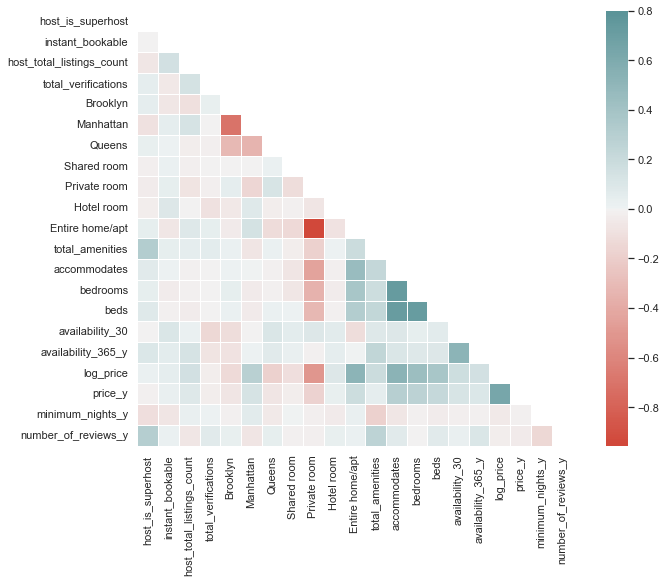

In [303]:
sns.set(style="white")

# Compute the correlation matrix
corr = df3[cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(15, 200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,square=True, linewidths=.5)
plt.show()

In [140]:
cols = ["host_listings_count", "host_total_listings_count", "accommodates", "bedrooms", "beds", 
#         "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", 
#         "minimum_nights_avg_ntm", "maximum_nights_avg_ntm",
 "availability_30", "availability_60", "availability_90", "availability_365_y", "price_y", "minimum_nights_y", "number_of_reviews_y",
"reviews_per_month_y", "review_scores_rating"]# "review_scores_accuracy", "review_scores_cleanliness",
# "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value" #, "calculated_host_listings_count_y""maximum_nights"

/var/folders/pr/vbbckh1132s7_94b6yhys1rr0000gn/T/ipykernel_17240/2949696060.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


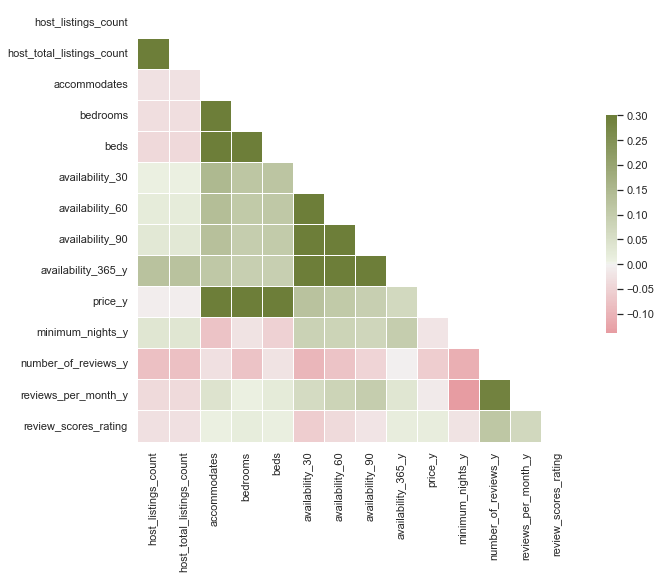

In [141]:
sns.set(style="white")

# Compute the correlation matrix
corr = df3[cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 100, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [274]:
cols = ['host_is_superhost', 'instant_bookable', 'host_total_listings_count', 
        'total_verifications', 
        'City of Los Angeles',
        'Shared room', 'Private room', 'Hotel room', 'Entire home/apt',
         #'Other Cities', 'Unincorporated Areas',
        'total_amenities', 
        'accommodates','bedrooms', 'beds', 
        "availability_30", "availability_365_y", 
        "price_y",
        "minimum_nights_y", "number_of_reviews_y"]
#  'host_listings_count', , "availability_60", "availability_90","reviews_per_month_y",  , 'number_of_reviews_ltm_x','number_of_reviews_l30d',"review_scores_rating",'Bronx', 'Shared room', 'host_has_profile_pic', 'host_identity_verified',, 'host_response_rate', 'host_acceptance_rate',"review_scores_accuracy", "review_scores_cleanliness",
# "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value" #, "calculated_host_listings_count_y""maximum_nights"

/var/folders/pr/vbbckh1132s7_94b6yhys1rr0000gn/T/ipykernel_17240/3121872506.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


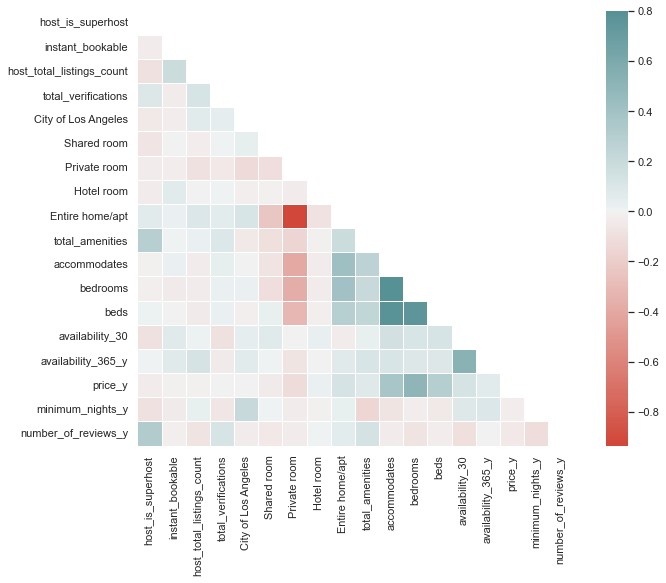

In [281]:
sns.set(style="white")

# Compute the correlation matrix
corr = df3[cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(15, 200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,square=True, linewidths=.5)
plt.show()

NYC

In [12]:
review_df = pd.read_csv("reviews.csv")

In [13]:
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [177]:
# pip install nltk

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
vader_polarity_compound = lambda s: (SentimentIntensityAnalyzer().polarity_scores(s))['compound']

In [174]:
# pip install TextBlob

In [175]:
# from textblob import TextBlob
# text = "Agréable séjour à  NY, le logement est bien situé dans un quartier sûr<br/>L’appartement est dans la même maison que Lisa mais suffisamment indépendant et Lisa est présente quand  on a besoin de quoi que ce soit. C’était un plaisir !<br/>La climatisation est très agréable, il peut faire très chaud à new york<br/>Le lit est confortable, la chambre assez grande pour tous les bagages, et la cuisine bien équipée<br/>C’est un appartement que je recommande tout à fait , proche des transports publics, pas trop loin de JFK, et dans un quartier très pittoresque."
# lang = TextBlob(text)

In [176]:
# lang

In [173]:
# pip install google_trans_new

In [172]:
# pip install googletrans==4.0.0-rc1

In [171]:
# from googletrans import Translator
# translator = Translator()
# translator.detect("Agréable séjour à  NY, le logement est bien situé dans un quartier sûr. L’appartement est dans la même maison que Lisa mais suffisamment indépendant et Lisa est présente quand  on a besoin de quoi que ce soit. C’était un plaisir ! La climatisation est très agréable, il peut faire très chaud à new york. Le lit est confortable, la chambre assez grande pour tous les bagages, et la cuisine bien équipée. C’est un appartement que je recommande tout à fait , proche des transports publics, pas trop loin de JFK, et dans un quartier très pittoresque.")

In [167]:
#pip install spacy

In [168]:
#pip install spacy_langdetect

In [169]:
# from spacy_langdetect import LanguageDetector
# import spacy
# nlp = spacy.load('en')  # 1
# nlp.add_pipe(LanguageDetector(), name='language_detector', last=True) #2
# text_content = "Agréable séjour à  NY, le logement est bien situé dans un quartier sûr. L’appartement est dans la même maison que Lisa mais suffisamment indépendant et Lisa est présente quand  on a besoin de quoi que ce soit. C’était un plaisir ! La climatisation est très agréable, il peut faire très chaud à new york. Le lit est confortable, la chambre assez grande pour tous les bagages, et la cuisine bien équipée. C’est un appartement que je recommande tout à fait , proche des transports publics, pas trop loin de JFK, et dans un quartier très pittoresque."
# doc = nlp(text_content) #3
# detect_language = doc._.language #4
# print(detect_language)

In [170]:
# pip install langdetect

In [43]:
from langdetect import DetectorFactory, detect
from langdetect.lang_detect_exception import LangDetectException
DetectorFactory.seed = 0
def getLang(text):
    try:
        if detect(text) != "en":
            return detect(text)
    except LangDetectException:
        return False
    return "en"

In [41]:
is_english("Agréable séjour à  NY, le logement est bien situé dans un quartier sûr. L’appartement est dans la même maison que Lisa mais suffisamment indépendant et Lisa est présente quand  on a besoin de quoi que ce soit. C’était un plaisir ! La climatisation est très agréable, il peut faire très chaud à new york. Le lit est confortable, la chambre assez grande pour tous les bagages, et la cuisine bien équipée. C’est un appartement que je recommande tout à fait , proche des transports publics, pas trop loin de JFK, et dans un quartier très pittoresque.")

'fr'

In [48]:
review_df["comments"] = review_df["comments"].apply(lambda x:str(x).replace("<br/>", ". ").replace("\r"," "))

In [49]:
review_df["language"] = review_df["comments"].apply(getLang)

In [50]:
review_df["language"].value_counts() 

en       755572
es        25660
fr        25555
de         8539
it         4275
pt         3562
ro         3358
zh-cn      2730
ko         2414
nl         2070
tl         1605
ru         1448
False      1417
so         1383
af         1374
ja         1151
ca         1060
cs          750
sv          614
da          584
no          501
pl          474
hr          370
hu          306
sw          292
cy          255
fi          248
vi          188
id          169
et          156
tr          126
sl          122
sk          110
he           66
zh-tw        65
el           39
ar           25
th           21
bg           15
lt           15
sq           15
lv           11
uk            6
mk            5
ur            3
fa            1
Name: language, dtype: int64

In [51]:
review_df.to_csv("reviews_language.csv")

In [ ]:
language_short_name = {'aa':'Afar','ab':'Abkhazian','af':'Afrikaans','ak':'Akan','sq':'Albanian','am':'Amharic','ar':'Arabic',
'an':'Aragonese','hy':'Armenian','as':'Assamese','av':'Avaric','ae':'Avestan','ay':'Aymara','az':'Azerbaijani','ba':'Bashkir',
'bm':'Bambara','eu':'Basque','be':'Belarusian','bn':'Bengali','bh':'Bihari languages','bi':'Bislama','bo':'Tibetan','bs':'Bosnian',
'br':'Breton','bg':'Bulgarian','my':'Burmese','ca':'Catalan; Valencian','cs':'Czech','ch':'Chamorro','ce':'Chechen','zh':'Chinese',
'cu':'Church Slavic; Old Slavonic; Church Slavonic; Old Bulgarian; Old Church Slavonic','cv':'Chuvash','kw':'Cornish','co':'Corsican',
'cr':'Cree','cy':'Welsh','cs':'Czech','da':'Danish','de':'German','dv':'Divehi; Dhivehi; Maldivian','nl':'Dutch; Flemish','dz':'Dzongkha',
'el':'Greek-Modern (1453-)','en':'English','eo':'Esperanto','et':'Estonian','eu':'Basque','ee':'Ewe','fo':'Faroese','fa':'Persian',
'fj':'Fijian','fi':'Finnish','fr':'French','fy':'Western Frisian','ff':'Fulah','Ga':'Georgian','gd':'Gaelic; Scottish Gaelic','ga':'Irish',
'gl':'Galician','gv':'Manx','el':'Greek-Modern (1453-)','gn':'Guarani','gu':'Gujarati','ht':'Haitian; Haitian Creole','ha':'Hausa',
'he':'Hebrew','hz':'Herero','hi':'Hindi','ho':'Hiri Motu','hr':'Croatian','hu':'Hungarian','hy':'Armenian','ig':'Igbo','is':'Icelandic',
'io':'Ido','ii':'Sichuan Yi; Nuosu','iu':'Inuktitut','ie':'Interlingue; Occidental',
'ia':'Interlingua (International Auxiliary Language Association)','id':'Indonesian','ik':'Inupiaq','is':'Icelandic','it':'Italian',
'jv':'Javanese','ja':'Japanese','kl':'Kalaallisut; Greenlandic','kn':'Kannada','ks':'Kashmiri','ka':'Georgian','kr':'Kanuri','kk':'Kazakh',
'km':'Central Khmer','ki':'Kikuyu; Gikuyu','rw':'Kinyarwanda','ky':'Kirghiz; Kyrgyz','kv':'Komi','kg':'Kongo','ko':'Korean',
'kj':'Kuanyama; Kwanyama','ku':'Kurdish','lo':'Lao','la':'Latin','lv':'Latvian','li':'Limburgan; Limburger; Limburgish','ln':'Lingala',
'lt':'Lithuanian','lb':'Luxembourgish; Letzeburgesch','lu':'Luba-Katanga','lg':'Ganda','mk':'Macedonian','mh':'Marshallese',
'ml':'Malayalam','mi':'Maori','mr':'Marathi','ms':'Malay','Mi':'Micmac','mk':'Macedonian','mg':'Malagasy','mt':'Maltese',
'mn':'Mongolian','mi':'Maori','ms':'Malay','my':'Burmese','na':'Nauru','nv':'Navajo; Navaho','nr':'Ndebele-South; South Ndebele',
'nd':'Ndebele-North; North Ndebele','ng':'Ndonga','ne':'Nepali','nl':'Dutch; Flemish','nn':'Norwegian Nynorsk; Nynorsk:Norwegian',
'nb':'Bokmål-Norwegian; Norwegian Bokmål','no':'Norwegian','oc':'Occitan (post 1500)','oj':'Ojibwa','or':'Oriya','om':'Oromo',
'os':'Ossetian; Ossetic','pa':'Panjabi; Punjabi','fa':'Persian','pi':'Pali','pl':'Polish','pt':'Portuguese','ps':'Pushto; Pashto',
'qu':'Quechua','rm':'Romansh','ro':'Romanian; Moldavian; Moldovan','rn':'Rundi','ru':'Russian','sg':'Sango','sa':'Sanskrit',
'si':'Sinhala; Sinhalese','sk':'Slovak','sk':'Slovak','sl':'Slovenian','se':'Northern Sami','sm':'Samoan','sn':'Shona','sd':'Sindhi',
'so':'Somali','st':'Sotho-Southern','es':'Spanish; Castilian','sq':'Albanian','sc':'Sardinian','sr':'Serbian','ss':'Swati',
'su':'Sundanese','sw':'Swahili','sv':'Swedish','ty':'Tahitian','ta':'Tamil','tt':'Tatar','te':'Telugu','tg':'Tajik','tl':'Tagalog',
'th':'Thai','bo':'Tibetan','ti':'Tigrinya','to':'Tonga (Tonga Islands)','tn':'Tswana','ts':'Tsonga','tk':'Turkmen','tr':'Turkish',
'tw':'Twi','ug':'Uighur; Uyghur','uk':'Ukrainian','ur':'Urdu','uz':'Uzbek','ve':'Venda','vi':'Vietnamese','vo':'Volapük','cy':'Welsh',
'wa':'Walloon','wo':'Wolof','xh':'Xhosa','yi':'Yiddish','yo':'Yoruba','za':'Zhuang; Chuang','zh':'Chinese','zu':'Zulu'}

In [55]:
review_df[review_df["language"] == "en"]["language"].value_counts()

en    755572
Name: language, dtype: int64

In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/manalshah/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [58]:
review_df['polarity'] = review_df[review_df["language"] == "en"].comments.map(vader_polarity_compound)

In [59]:
review_df['polarity'].value_counts()

 0.0000    18283
 0.6249    15957
 0.6588     8132
 0.4404     5374
 0.8481     4065
           ...  
-0.2533        1
 0.0148        1
 0.0231        1
-0.2114        1
-0.9484        1
Name: polarity, Length: 12398, dtype: int64

In [60]:
review_df.to_csv("review_polarity.csv")

In [61]:
nyc_df = pd.read_csv("NYC data.csv")

/Users/manalshah/opt/anaconda3/envs/ml/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,18,22,25,41,68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [95]:
cols_nyc=['host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
        'total_verifications', 'total_amenities', 'Entire home/apt',
       'Hotel room', 'Private room', 'Shared room', 'Bronx', 'Brooklyn',
       'Manhattan', 'Queens', 'Staten Island', 'instant_bookable', 
        "host_listings_count", "host_total_listings_count", "accommodates", "bedrooms", "beds","bathrooms","shared_bathrooms", 
 "availability_30", "availability_60", "availability_90", "availability_365",
 "minimum_nights", "number_of_reviews", 'number_of_reviews_ltm',
       'number_of_reviews_l30d',"reviews_per_month", "review_scores_rating"]

In [67]:
nyc_df[cols_nyc]

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,total_verifications,total_amenities,Entire home/apt,Hotel room,...,availability_30,availability_60,availability_90,availability_365,minimum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,reviews_per_month,review_scores_rating
0,2595.0,35.0,18.0,0.0,1.0,1.0,9.0,31.0,1.0,0.0,...,0.0,17.0,47.0,322.0,30,48.0,0.0,0.0,0.33,4.70
1,3831.0,21.0,76.0,0.0,1.0,1.0,6.0,35.0,1.0,0.0,...,4.0,10.0,33.0,220.0,1,408.0,38.0,0.0,4.91,4.46
2,5121.0,100.0,100.0,0.0,1.0,1.0,8.0,5.0,0.0,0.0,...,30.0,60.0,90.0,365.0,30,50.0,0.0,0.0,0.53,4.52
3,5136.0,100.0,25.0,0.0,1.0,1.0,3.0,14.0,1.0,0.0,...,0.0,2.0,3.0,91.0,5,2.0,1.0,0.0,0.02,5.00
4,5178.0,100.0,100.0,0.0,1.0,0.0,4.0,25.0,0.0,0.0,...,4.0,4.0,26.0,218.0,2,505.0,31.0,4.0,3.70,4.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37709,53123149.0,97.0,18.0,0.0,1.0,1.0,7.0,20.0,0.0,0.0,...,29.0,59.0,89.0,364.0,30,0.0,0.0,0.0,0.00,0.00
37710,53123691.0,97.0,18.0,0.0,1.0,1.0,7.0,22.0,0.0,0.0,...,29.0,59.0,89.0,364.0,30,0.0,0.0,0.0,0.00,0.00
37711,53123840.0,90.0,83.0,0.0,1.0,1.0,7.0,20.0,1.0,0.0,...,23.0,53.0,83.0,358.0,1,0.0,0.0,0.0,0.00,0.00
37712,53126354.0,97.0,18.0,0.0,1.0,1.0,7.0,22.0,0.0,0.0,...,29.0,59.0,89.0,364.0,30,0.0,0.0,0.0,0.00,0.00


In [73]:
#review_df.columns
polarity_df = review_df.groupby(by = ["listing_id"])["polarity"].mean().reset_index()

In [75]:
polarity_df["id"] = polarity_df["listing_id"].astype("float64")
#pd.merge(nyc_df, polarity_df, on = [])

In [77]:
polarity_df.drop(columns = ["listing_id"], inplace= True)

In [87]:
nyc_df[nyc_df["price"] == 0]

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,...,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,total_verifications,shared_bathrooms,total_amenities
287,287,174966.0,https://www.airbnb.com/rooms/174966,2.021110e+13,2021-11-03,Luxury 2Bed/2.5Bath Central Park View,DETAILS: Designer-decorated luxury two bedroo...,NaN,https://a0.muscache.com/pictures/5273916/2bd6e...,836168.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,31.0
641,641,468613.0,https://www.airbnb.com/rooms/468613,2.021110e+13,2021-11-03,$1300 5/14 - 6/1 - 3 weeks - room f,<b>The space</b><br />Great room in incredible...,NaN,https://a0.muscache.com/pictures/5514600/8f890...,2325861.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,1.0
805,805,634353.0,https://www.airbnb.com/rooms/634353,2.021110e+13,2021-11-03,Luxury 1Bed with Central Park Views,<b>The space</b><br />LUXURY ONE BEDROOM WITH ...,NaN,https://a0.muscache.com/pictures/10362796/2620...,836168.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,31.0
851,851,664047.0,https://www.airbnb.com/rooms/664047,2.021110e+13,2021-11-03,Lux 2Bed/2.5Bath Central Park Views,DETAILS: Designer-decorated luxury two bedroo...,NaN,https://a0.muscache.com/pictures/24068437/456a...,836168.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,32.0
1156,1156,893413.0,https://www.airbnb.com/rooms/893413,2.021110e+13,2021-11-03,Architecturally Stunning Former Synagogue!,"This prized townhouse, formerly a synagogue, i...",This extraordinary property is in the heart of...,https://a0.muscache.com/pictures/00826d8f-ceb3...,4751930.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37599,37598,53061939.0,https://www.airbnb.com/rooms/53061939,2.021110e+13,2021-11-03,All-inclusive apartment home | 2 BR in New York,Stay for 30+ nights (minimum nights and rates ...,NaN,https://a0.muscache.com/pictures/a4re/floorpla...,359229620.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,27.0
37600,37599,53061940.0,https://www.airbnb.com/rooms/53061940,2.021110e+13,2021-11-03,All-inclusive apartment home | 2 BR in New York,Stay for 30+ nights (minimum nights and rates ...,NaN,https://a0.muscache.com/pictures/a4re/floorpla...,359229620.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,27.0
37604,37603,53061953.0,https://www.airbnb.com/rooms/53061953,2.021110e+13,2021-11-03,All-inclusive apartment home | 2 BR in New York,Stay for 30+ nights (minimum nights and rates ...,NaN,https://a0.muscache.com/pictures/a4re/floorpla...,359229620.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,27.0
37669,37668,53093610.0,https://www.airbnb.com/rooms/53093610,2.021110e+13,2021-11-03,Lovely Central Park Apartment with direct views,Enjoy a park experience at this centrally-loca...,Excellent neighborhood the best NYC has to offer.,https://a0.muscache.com/pictures/miso/Hosting-...,62693751.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,8.0


In [90]:
np.log(nyc_df["price"]).value_counts()

/Users/manalshah/opt/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


5.010635    1275
4.605170    1156
3.912023     918
4.094345     879
4.317488     795
            ... 
6.496775       1
6.678342       1
6.230481       1
6.525030       1
6.196444       1
Name: price, Length: 754, dtype: int64

In [91]:
polarity_df

,polarity,id
0,0.795956,2595.0
1,0.800626,3831.0
2,0.877369,5121.0
3,0.990100,5136.0
4,0.762694,5178.0
...,...,...
27622,0.996000,51909801.0
27623,0.658800,51910059.0
27624,0.765000,51921047.0
27625,0.861900,51926089.0


In [94]:
merged_df = pd.merge(nyc_df, polarity_df, on = "id", how = "inner")

In [99]:
final_df = merged_df[(merged_df["price"]!=0) & (merged_df["price"]<400)]
#final_df["polarity"].dropna()

24877

In [100]:
X_nyc=pd.DataFrame(final_df[cols_nyc]).to_numpy()
y_nyc=pd.DataFrame(final_df["price"]).to_numpy()
y_nyc=np.log(y_nyc)
print(X_nyc.shape)
print(y_nyc.shape)

nyc_train= 15000

(24877, 34)
(24877, 1)


In [106]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

n_samples, n_features = nyc_train,X_nyc.shape[1]
rdg = Ridge(alpha = 0.01)  #
rdg.fit(X_nyc[:nyc_train], y_nyc[:nyc_train])  
y_nyc_pred = rdg.predict(X_nyc[nyc_train:])

print("Mean squared error: %.2f" % mean_squared_error(y_nyc[nyc_train:], y_nyc_pred))
print('Coefficients: \n', rdg.coef_)
print("R2:", r2_score(y_nyc[nyc_train:,:], y_nyc_pred))

Mean squared error: 0.16
Coefficients: 
 [[-5.85888566e-05 -6.71057779e-04  5.30797965e-02 -6.18533908e-02
   2.49790981e-02 -1.64385298e-04  4.98220649e-03  2.17286226e-01
   4.30645821e-01 -2.70729198e-01 -3.77202847e-01 -1.69370471e-01
   8.54959300e-02  3.28538380e-01 -6.11013022e-02 -1.83562536e-01
  -1.62867857e-02  1.04486481e-04  1.04486530e-04  7.01595820e-02
   9.32933097e-02 -1.05792883e-02  5.48182078e-02 -1.66759945e-01
   8.86161605e-03 -8.30138514e-05  8.22573179e-04 -7.68191800e-05
  -7.81261525e-04 -2.63194243e-04 -1.18691303e-03  1.56656028e-02
  -2.69773186e-03  2.52177989e-02]]
R2: 0.5823557965409285


/var/folders/pr/vbbckh1132s7_94b6yhys1rr0000gn/T/ipykernel_66045/1620399153.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


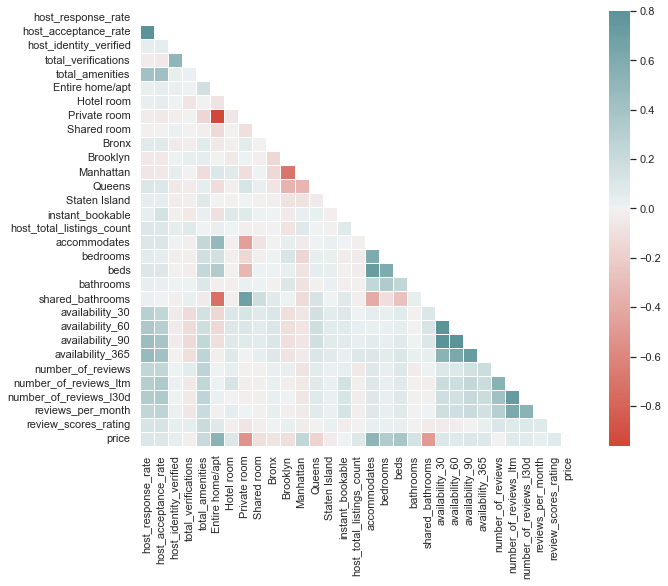

In [166]:
import seaborn as sns
sns.set(style="white")

# Compute the correlation matrix
corr = final_df[cols_nyc+["price"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(15, 200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,square=True, linewidths=.5)
plt.show()

In [121]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=9, random_state=42)
n_samples, n_features = nyc_train,X_nyc.shape[1]

regr.fit(X_nyc[:nyc_train], y_nyc[:nyc_train])
y_nyc_pred = regr.predict(X_nyc[nyc_train:])

print("Mean squared error: %.2f" % mean_squared_error(y_nyc[nyc_train:], y_nyc_pred))
print("R2:", r2_score(y_nyc[nyc_train:,:], y_nyc_pred))

/var/folders/pr/vbbckh1132s7_94b6yhys1rr0000gn/T/ipykernel_66045/11825797.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_nyc[:nyc_train], y_nyc[:nyc_train])


Mean squared error: 0.14
R2: 0.6269771600309832


In [138]:
from sklearn import ensemble
params = {
    "n_estimators": 300,
    "max_depth": 3,
    "min_samples_split": 5,
    "learning_rate": 0.08,
    "loss": "squared_error",
}
regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_nyc[:nyc_train], y_nyc[:nyc_train])
y_nyc_pred = regr.predict(X_nyc[nyc_train:])

print("Mean squared error: %.2f" % mean_squared_error(y_nyc[nyc_train:], y_nyc_pred))
print("R2:", r2_score(y_nyc[nyc_train:,:], y_nyc_pred))

/Users/manalshah/opt/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean squared error: 0.14
R2: 0.6413679575550979


In [140]:
pip install gensim

  Using cached gensim-4.1.2-cp38-cp38-macosx_10_9_x86_64.whl (24.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [141]:
import gensim

In [144]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1

model_t = Word2Vec(review_df["comments"], vector_size=100, workers=8, \
                    min_count=5, epochs=30, window=5, compute_loss=True, callbacks=[callback()])
#model_t.save('./model_t.model')

Loss after epoch 0: 12574003.0
Loss after epoch 1: 10595465.0
Loss after epoch 2: 10543476.0
Loss after epoch 3: 5672852.0
Loss after epoch 4: 5664496.0
Loss after epoch 5: 5625212.0
Loss after epoch 6: 5609676.0
Loss after epoch 7: 5546068.0
Loss after epoch 8: 5279432.0
Loss after epoch 9: 49872.0
Loss after epoch 10: 49192.0
Loss after epoch 11: 50424.0
Loss after epoch 12: 51192.0
Loss after epoch 13: 51120.0
Loss after epoch 14: 50480.0
Loss after epoch 15: 49376.0
Loss after epoch 16: 49280.0
Loss after epoch 17: 48856.0
Loss after epoch 18: 48672.0
Loss after epoch 19: 48536.0
Loss after epoch 20: 48040.0
Loss after epoch 21: 48448.0
Loss after epoch 22: 48648.0
Loss after epoch 23: 48720.0
Loss after epoch 24: 46752.0
Loss after epoch 25: 45128.0
Loss after epoch 26: 46240.0
Loss after epoch 27: 45240.0
Loss after epoch 28: 41480.0
Loss after epoch 29: 39352.0


In [154]:
model_t.save("word2vec.wordvectors")

In [157]:
# import gensim.scripts.word2vec2tensor
# gensim.scripts.word2vec2tensor.word2vec2tensor('word2vec.wordvectors', 'store_review', binary=False)

In [159]:
def get_feature_ranking(feature_scores):
    indices = np.nonzero(feature_scores)[0].tolist()
    scores = np.abs(feature_scores[indices]).tolist() 
    sorted_scores, sorted_features = zip(*sorted(zip(scores, indices),reverse=True))
    return list(sorted_features)

XGB Features Ranking: [7, 13, 19, 20, 23, 24, 33, 22, 28, 6, 32, 25, 18, 26, 17, 12, 29, 5, 14, 27, 1, 30, 8, 0, 10, 11, 15, 16, 9, 21, 4, 31, 3, 2]


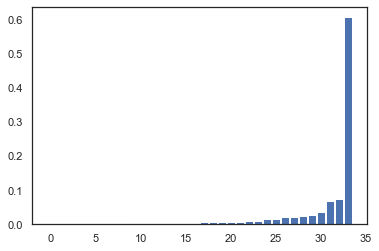

In [163]:
etrees_features = get_feature_ranking(regr.feature_importances_)
print('XGB Features Ranking:',etrees_features)
#plot_features_ranking(etrees.feature_importances_, 'XGBoost', selected_features)
# plot
plt.bar(range(len(regr.feature_importances_)), sorted(regr.feature_importances_))
plt.show()


LA

In [180]:
cd LA

/Users/manalshah/Desktop/ML Project/Dataset/LA


In [181]:
review_la = pd.read_csv("reviews-2.csv")

In [182]:
review_la["comments"] = review_la["comments"].apply(lambda x:str(x).replace("<br/>", ". ").replace("\r"," "))

In [183]:
review_la["language"] = review_la["comments"].apply(getLang)

In [184]:
review_la["language"].value_counts() 

en       1029218
fr         12012
es          8670
zh-cn       8405
de          6301
ro          5045
ko          4975
tl          2015
af          1892
it          1804
pt          1686
so          1535
False       1529
ja          1379
nl          1120
ca          1014
ru           954
cs           929
sv           672
no           626
pl           551
hr           515
da           418
sw           393
hu           347
cy           290
vi           239
id           231
fi           228
et           228
sl           176
zh-tw        168
tr           113
sk           107
he            36
ar            31
sq            28
lt            13
bg            13
el            13
lv            12
th            10
hi             2
te             1
mk             1
ur             1
uk             1
Name: language, dtype: int64

In [185]:
review_la.to_csv("reviews_language.csv")

In [9]:
cd LA

/Users/manalshah/Desktop/ML Project/Dataset/LA


In [10]:
review_la = pd.read_csv("reviews_language.csv")

In [11]:
review_la[review_la["language"] == "en"]["language"].value_counts()

en    1029218
Name: language, dtype: int64

In [16]:
review_la['polarity'] = review_la[review_la["language"] == "en"].comments.map(vader_polarity_compound)

In [17]:
review_la.to_csv("reviews_polarity.csv")